In [1]:
import numpy as np 
import pandas as pd 
import pickle

import torch 
import torch.nn as nn 
import torch.optim as optim
from sklearn.manifold import MDS

from tqdm import tqdm

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
sys.path.append('..')

from utils.viz import viz 
from utils.env_fn import gauss_blob_task
from utils.model import MLP
viz.get_style()

In [71]:
theta = [10, -5, .1, 5, .10]
x, y = np.meshgrid(np.linspace(-2, 2, 5), np.linspace(-2, 2, 5))
xx = np.hstack([y.reshape([-1, 1]), x.reshape([-1, 1])])

def proj(x, phi):
    phi_bound = np.deg2rad(phi)
    phi_ort = phi_bound - np.deg2rad(0)
    return x@np.array([np.cos(phi_ort), np.array(phi_ort)]).reshape([-1, 1])

def transducer(x, offset, slope, lapse):
    return lapse + (1-2*lapse) / (1+np.exp(-slope*(x - offset))) 

x_ort = np.hstack([proj(xx, theta[0]), proj(xx, theta[1])])
y_hat = transducer(x_ort, theta[2], theta[3], theta[4])

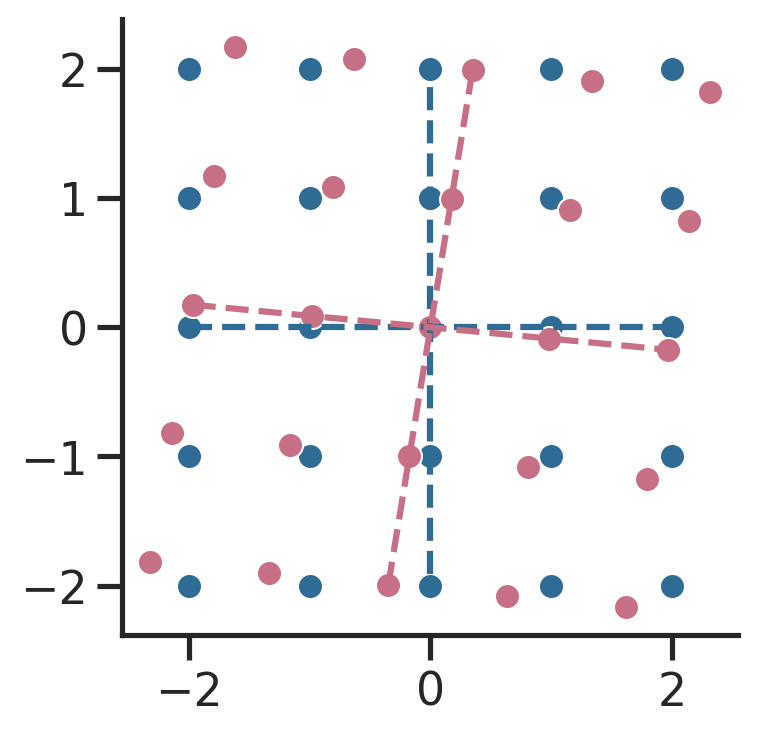

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.scatterplot(x=xx[:, 0], y=xx[:, 1],
                color=viz.Blue)
sns.lineplot(x=xx[:, 1].reshape([5, 5])[2, :], y=xx[:, 0].reshape([5, 5])[2, :],
             color=viz.Blue, ls='--')
ax.axvline(x=0, ymin=.1, ymax=.9, color=viz.Blue, ls='--')
x1 = x_ort[:, 0]
x2 = x_ort[:, 1].reshape(
    [5, 5]).reshape([-1], order='F')
sns.scatterplot(x=x1, y=x2,
                color=viz.Red)
sns.lineplot(x=x1.reshape([5, 5])[2, :], y=x2.reshape([5, 5])[2, :],
             color=viz.Red, ls='--')
sns.lineplot(x=x1.reshape([5, 5])[:, 2], y=x2.reshape([5, 5])[:, 2],
             color=viz.Red, ls='--')
ax.set_box_aspect(1)